In [1]:
import wandb

In [2]:
wandb.login()

True

In [3]:
wandb.init(project="lorenz_lstm", group="Lorenz",save_code=True,notes="Lorenz LSTM run and evaluation")

In [4]:
from torchdiffeq import odeint
import torch
import torch.nn as nn
import torch.optim as optim
from torch.nn import functional as F
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import clear_output
import seaborn as sns

In [5]:
def visualize(real=None, train=None, save=None, title=''):
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(1, 1, 1, projection='3d')
    
    ax.set_title('Lorenz Attractor \n'+title)

    if train is not None:
      sns.set(style='darkgrid')
      
      z = np.array([o.detach().numpy() for o in train])
      z = np.reshape(z, [-1,3])
      sc = ax.scatter(z[:,0], z[:,1], z[:,2], c=z[:,2], cmap='Greens', s=1)
      #cbar = fig.colorbar(sc)

    if real is not None:
      #sns.set(style='darkgrid')
      
      z = np.array([o.detach().numpy() for o in real])
      z = np.reshape(z, [-1,3])
      ax.scatter(z[:,0], z[:,1], z[:,2], marker='.', color='k', alpha=0.5, linewidths=0, s=45)
      #sc = ax.scatter(z[:,0], z[:,1], z[:,2], c=z[:,2], cmap='Reds', s=1)
      #cbar = fig.colorbar(sc)
      #ax.scatter(, marker='.', c=c,cmap='viridis', alpha=0.5, linewidths=0, s=45)

    fig.canvas.draw()
    fig.canvas.flush_events()
    if save is not None:
        plt.savefig(save+'.png', format='png', dpi=400, bbox_inches ='tight', pad_inches = 0.1)
    plt.show()

In [6]:
class Lorenz(nn.Module):
    """
    chaotic lorenz system
    """
    def __init__(self):
        super(Lorenz, self).__init__()
        self.lin = nn.Linear(5, 3, bias=False)
        W = torch.tensor([[-10., 10., 0., 0., 0.],
                          [28., -1., 0., -1., 0.],
                          [0., 0., -8. / 3., 0., 1.]])
        self.lin.weight = nn.Parameter(W)

    def forward(self, t, x):
        y = y = torch.ones([1, 5])
        y[0][0] = x[0][0]
        y[0][1] = x[0][1]
        y[0][2] = x[0][2]
        y[0][3] = x[0][0] * x[0][2]
        y[0][4] = x[0][0] * x[0][1]
        return self.lin(y)

true_y0 = torch.tensor([[0.5, 0.5, 20.]])  # initial condition
t = torch.linspace(0., 25., 5000)  # t is from 0 to 25 for 1000 data points

# generating training data
with torch.no_grad():
    data = odeint(Lorenz(), true_y0, t)

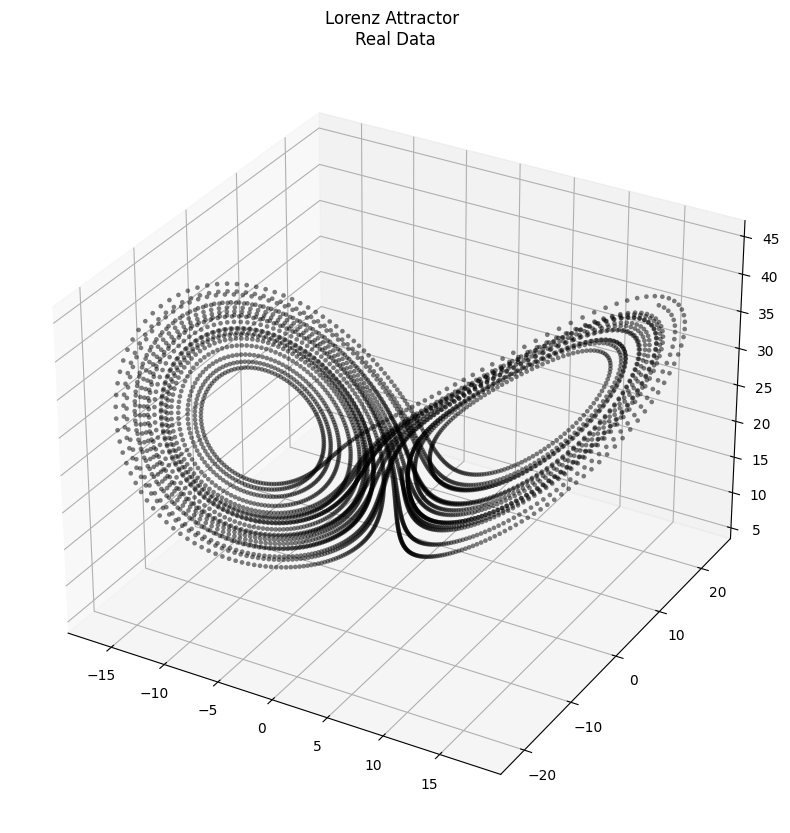

In [7]:
visualize(real=data,save='real',title='Real Data')

In [8]:
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        # Initialize hidden state with zeros
        h0 = torch.zeros(1, x.size(0), self.lstm.hidden_size).to(x.device)
        c0 = torch.zeros(1, x.size(0), self.lstm.hidden_size).to(x.device)

        # Forward pass through LSTM layer
        out, _ = self.lstm(x, (h0, c0))

        # Reshape output for the fully connected layer
        out = out[:, -1, :]

        # Fully connected layer
        out = self.fc(out)

        return out

# Define input size, hidden size, and output size
input_size = 3
hidden_size = 16
output_size = 3

# Create an instance of the LSTMModel
lstm_model = LSTMModel(input_size, hidden_size, output_size)

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(lstm_model.parameters())

# Print the model architecture
print(lstm_model)

In [9]:
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        # Initialize hidden state with zeros
        h0 = torch.zeros(1, x.size(0), self.lstm.hidden_size).to(x.device)
        c0 = torch.zeros(1, x.size(0), self.lstm.hidden_size).to(x.device)

        # Forward pass through LSTM layer
        out, _ = self.lstm(x, (h0, c0))

        # Reshape output for the fully connected layer
        out = out[:, -1, :]

        # Fully connected layer
        out = self.fc(out)

        return out

# Define input size, hidden size, and output size
input_size = 3
hidden_size = 512
output_size = 3

# Create an instance of the LSTMModel
lstm_model = LSTMModel(input_size, hidden_size, output_size)

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(lstm_model.parameters())

# Print the model architecture
print(lstm_model)

In [10]:
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        # Initialize hidden state with zeros
        h0 = torch.zeros(1, x.size(0), self.lstm.hidden_size).to(x.device)
        c0 = torch.zeros(1, x.size(0), self.lstm.hidden_size).to(x.device)

        # Forward pass through LSTM layer
        out, _ = self.lstm(x, (h0, c0))

        # Reshape output for the fully connected layer
        out = out[:, -1, :]

        # Fully connected layer
        out = self.fc(out)

        return out

# Define input size, hidden size, and output size
input_size = 3
hidden_size = 512
output_size = 3

# Create an instance of the LSTMModel
lstm_model = LSTMModel(input_size, hidden_size, output_size)

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(lstm_model.parameters())

In [11]:
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        # Initialize hidden state with zeros
        h0 = torch.zeros(1, x.size(0), self.lstm.hidden_size).to(x.device)
        c0 = torch.zeros(1, x.size(0), self.lstm.hidden_size).to(x.device)

        # Forward pass through LSTM layer
        out, _ = self.lstm(x, (h0, c0))

        # Reshape output for the fully connected layer
        out = out[:, -1, :]

        # Fully connected layer
        out = self.fc(out)

        return out

# Define input size, hidden size, and output size
input_size = 3
hidden_size = 512
output_size = 3

# Create an instance of the LSTMModel
model = LSTMModel(input_size, hidden_size, output_size)

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters())

In [12]:
def get_batch(true_y, batch_size):
    num_samples = len(true_y)
    indices = np.random.choice(np.arange(num_samples - batch_size, dtype=np.int64), size=batch_size, replace=False)
    indices.sort()
    batch_y0 = true_y[indices]  # (batch_size, D)  # (batch_size)
    batch_y = torch.stack([true_y[indices + batch_size-1]])  # (batch_size, M, D)
    return batch_y0, batch_y.squeeze(0)

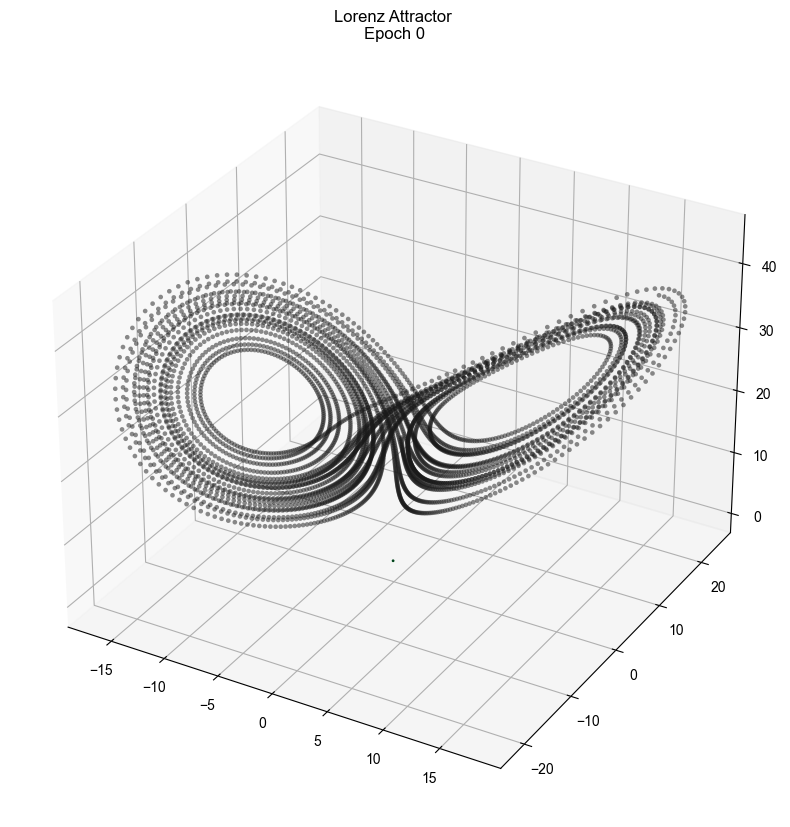

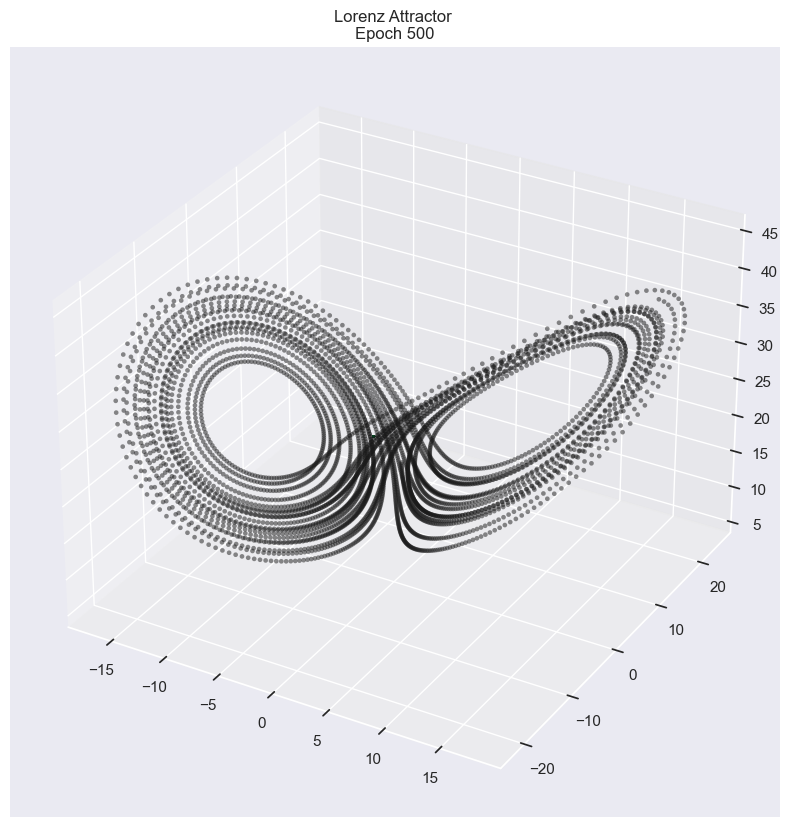

In [13]:
num_epochs = 10000
for epoch in range(num_epochs):
    optimizer.zero_grad()
    x,y = get_batch(data, batch_size=50)
    # Forward pass
    predicted_lorenz = model(x)

    # Compute the loss
    loss = criterion(predicted_lorenz, y)

    # Backpropagation
    loss.backward()
    optimizer.step()

    if epoch % 500 == 0:
        
        predictions = []
        with torch.no_grad():
            input_seq = data[0]
            for i in range(5000):
                output = model(input_seq.unsqueeze(0))
                predictions.append(output)
                input_seq = output
        predictions = torch.stack(predictions)
        loss = F.mse_loss(predictions, data)
        visualize(real=data, 
                             train=predictions,save='PNG/{}'.format(epoch),title='Epoch {}'.format(epoch))
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')
        clear_output(wait=True)

In [14]:
x,y = get_batch(data, batch_size=50)

In [15]:
x.shape

torch.Size([50, 1, 3])

In [16]:
y.shape

torch.Size([50, 1, 3])

In [17]:
predicted_lorenz = model(x)

In [18]:
predicted_lorenz.shape

torch.Size([50, 3])

In [19]:
data.shape

torch.Size([5000, 1, 3])

In [20]:
import wandb

In [21]:
wandb.login()

True

In [22]:
wandb.init(project="lorenz_lstm", group="Lorenz",save_code=True,notes="Lorenz LSTM run and evaluation")